## Project 1 - Intro To Data Science
  
# Data Cleaning
By Justin Huther

OBJECTIVE:

After cleaning and inspection of the data, we can start thinking of some questions about it that we would want to answer.

What were the most popular Sub-products over time?

Which Months had the most reports?

Which companies had the most reports?

In [55]:
import os
import pandas as pd
import numpy as np
#import libraries

## Read data from CSV into DataFrame

In [56]:
path = "complaints"
#path to the file
complaints_data = pd.DataFrame()
complaints_data = pd.read_csv(path + ".csv")
#read from csv into DataFrame

In [57]:
months = ["January","February","March","April","May","June","July",
            "August","September","October","November","December"]

In [58]:
complaints_data.head(3)
#print head

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,6/13/19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,18640.0,NaN,Consent not provided,Web,6/13/19,Closed with explanation,Yes,NaN,3274605
1,11/1/19,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,8854.0,NaN,Consent provided,Web,11/1/19,Closed with explanation,Yes,NaN,3425257
2,4/1/19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067.0,NaN,Consent not provided,Web,4/1/19,Closed with explanation,Yes,NaN,3198225


## What is the shape of our DataFrame?

In [59]:
print("The shape in (rows, cols) =", complaints_data.shape)
#print shape

The shape in (rows, cols) = (50001, 18)


## Lets clean up the data!

Drop Tags Column

Drop rows of NAN


In [60]:
# drop 'Tags'
complaints_data = complaints_data.drop(columns=['Tags'])
nan_df = complaints_data[complaints_data.isna().any(axis=1)]


In [61]:
# drop NAN
all_data = complaints_data.dropna(how='all')
all_data.to_csv("all_data_noNan.csv", index=False)


## Convert 'ZIP Code' column to correct type

In [62]:
all_data = all_data.dropna(subset=['ZIP code'])
#Drop NaN characters
all_data['ZIP code'] = all_data['ZIP code'].astype(int)
#Convert to int

## Convert 'Timely response?' column to correct type

In [63]:
all_data = all_data.dropna(subset=['Timely response?'])
#Drop NaN characters
all_data['Timely response?'] = all_data['Timely response?'] == 'Yes'
#Convert to bool
all_data['Consumer disputed?'] = all_data['Consumer disputed?'] == 'Yes'
#Convert to bool
all_data['Date received'] = pd.to_datetime(all_data['Date received'])
#Convert to date time

## Add 'month_year' and 'Month' column

In [64]:

all_data['month_year'] = pd.to_datetime(all_data['Date received']).dt.to_period('M')
#create month_year column and fill from datetime
all_data['Month'] = pd.to_datetime(all_data['Date received']).dt.month
#create Month column and fill from datetime

## Output cleaned DataFrame to CSV

In [65]:
all_data.to_csv(path + "_cleaned.csv", index=False)
#output to csv
all_data.head(3)
#print head

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,month_year,Month
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,18640,Consent not provided,Web,6/13/19,Closed with explanation,True,False,3274605,2019-06,6
1,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,8854,Consent provided,Web,11/1/19,Closed with explanation,True,False,3425257,2019-11,11
2,2019-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067,Consent not provided,Web,4/1/19,Closed with explanation,True,False,3198225,2019-04,4


## Data Exploration!
Let us look at the number of complaints over time.

The graph below represents the amount of complaints.

48609 complaints total.
The highest number of reports ( 3629 ) was during 2019-04
month_year
2019-04    3629
2019-05    3281
2019-06    3161
2019-07    3045
2019-08    2860
Freq: M, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='Complaints'>

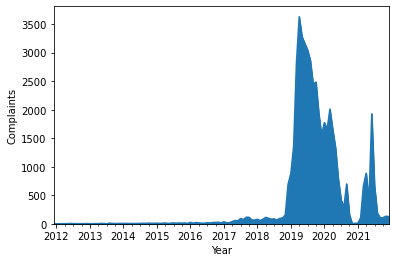

In [66]:
complaints_overTime = all_data.groupby('month_year').size().sort_values(ascending=False)
#create grouped Series to count complaints/time
print(complaints_overTime.sum(), "complaints total.")
#print total complaints
print(
    "The highest number of reports (",
    complaints_overTime.values[0],
    ") was during",
    complaints_overTime.index[0]
    )
#print top complaint
print(complaints_overTime.head())
#print head
complaints_overTime.sort_index(ascending=False).plot.area(xlabel="Year", ylabel="Complaints", legend=False)
#plot 

## Next, let us look at the number of Timely Responses, and the response, over time.

The graph below represents the amount of responses, and the color represents the response given.

Timely response?
False      752
True     47857
dtype: int64
Timely response?  False  True 
month_year                    
2021-12               0    128
2021-11               1    131
2021-10               1    106
2021-09               1    105
2021-08               1    187


<AxesSubplot:xlabel='Year', ylabel='Number of Responses'>

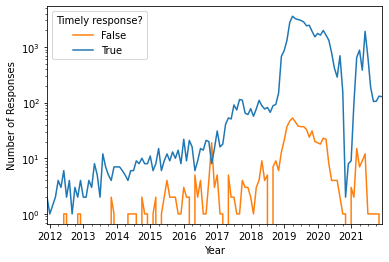

In [67]:
timelyResponses_time = (
    all_data.sort_values(by='month_year')
    .groupby(pd.Grouper(key='month_year'))
    ['Timely response?'].value_counts()
    .unstack(fill_value=0)
)
#Group and sort 
print(timelyResponses_time.sum(axis=0).head())
print(timelyResponses_time.sort_index(ascending=False).head())
#Print head
timelyResponses_time.plot.line(logy=True, color=['C1', 'C0'], xlabel="Year", ylabel='Number of Responses')
#plot

## Next, let us consider the problem ('Product') with the most complaints.

The graph below represents the number of complaints for each.
It has a logarithm applied to the x-axis for better readability.

Product ' Credit reporting, credit repair services, or other personal consumer reports ' had the highest number of reports ( 24733 )
Product
Credit reporting, credit repair services, or other personal consumer reports    24733
Debt collection                                                                  8260
Credit card or prepaid card                                                      4217
Mortgage                                                                         3949
Checking or savings account                                                      3581
dtype: int64


<AxesSubplot:ylabel='Product'>

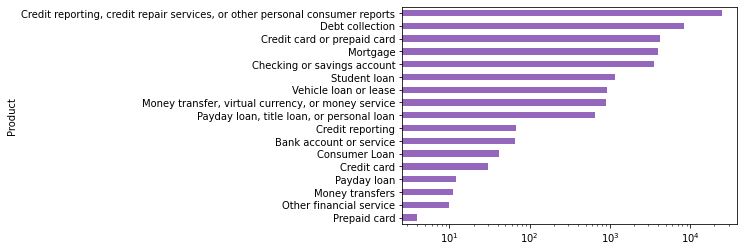

In [68]:
productReports = all_data.groupby('Product').size().sort_values(ascending=False)
#Group and sort
print(
    "Product '",
    productReports.index[0],
    "' had the highest number of reports (",
    productReports.values[0],
    ")"
    )
#Print top result
print(productReports.head())
#Print head
productReports.sort_values(ascending=True).plot.barh(ylabel="Number of Reports", logx=True, color='C4')
#plot

## Question: What were the most popular Sub-products over time?

Credit reporting is the most popular Sub-product, with 24359 complaints total.
Sub-product
Credit reporting                              24359
General-purpose credit card or charge card     3177
Checking account                               2766
Conventional home mortgage                     2337
Other debt                                     2211
dtype: int64


<AxesSubplot:xlabel='Year', ylabel='Number of Responses'>

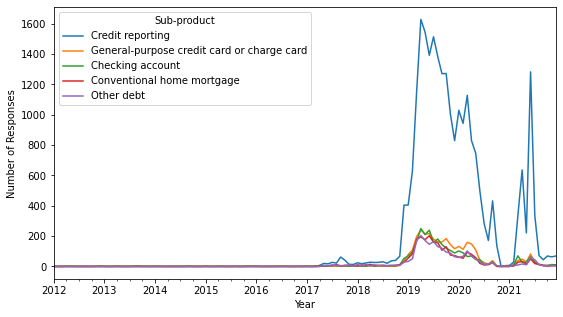

In [69]:
subProducts_time = (
    all_data.sort_values(by='month_year')
    .groupby(pd.Grouper(key='month_year'))
    ['Sub-product'].value_counts()
    .unstack(fill_value = 0)
    )
#Group and sort data for all sub products
subProducts_time = (
    subProducts_time[
        subProducts_time.sum(0)
        .sort_values(ascending=False)
        [:5].index]
    )
#Keep only the five most popular
print(
    subProducts_time.sum(axis=0).index[0], 
    "is the most popular Sub-product, with", 
    subProducts_time.sum(axis=0)[0], 
    "complaints total."
    )
#print top result
print(subProducts_time.sum(axis=0).head())
#Print head
subProducts_time.plot.line(xlabel="Year", ylabel='Number of Responses', legend=True, figsize=(9, 5))
#plot

## Question: Which Months had the most reports?

Month 4 ( April ) had the highest number of reports ( 6373 )
Month
4    6373
6    6057
3    5646
5    5201
7    4359
dtype: int64


<AxesSubplot:xlabel='Month', ylabel='Number of Reports'>

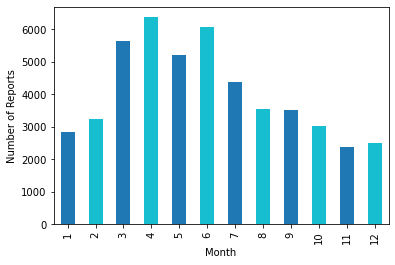

In [70]:
productReports = all_data.groupby('Month').size().sort_values(ascending=False)
#Group and sort
print(
    "Month",
    productReports.index[0],
    "(", months[productReports.index[0] - 1], ")",
    "had the highest number of reports (",
    productReports.values[0],
    ")"
    )
print(productReports.head())
#Print head
productReports.sort_index().plot.bar(ylabel="Number of Reports",color=['C0', 'C9'])
#plot

## Question: Which companies had the most reports?

EQUIFAX, INC. is the most popular Company, with 7766 complaints total.
Company
EQUIFAX, INC.                             7766
Experian Information Solutions Inc.       6982
TRANSUNION INTERMEDIATE HOLDINGS, INC.    6123
JPMORGAN CHASE & CO.                      1370
CAPITAL ONE FINANCIAL CORPORATION         1301
dtype: int64


<AxesSubplot:xlabel='Year', ylabel='Number of Complaints'>

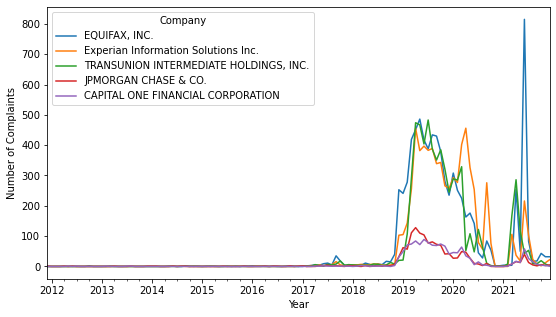

In [71]:
companyComplaints_time = (
    all_data.sort_values(by='month_year')
    .groupby(pd.Grouper(key='month_year'))
    ['Company'].value_counts()
    .unstack(fill_value = 0)
    )
#Group and sort data for all sub products
companyComplaints_time = (
    companyComplaints_time[
        companyComplaints_time.sum(0)
        .sort_values(ascending=False)
        [:5].index]
    )
#Keep only the five most popular
print(
    companyComplaints_time.sum(axis=0).index[0], 
    "is the most popular Company, with", 
    companyComplaints_time.sum(axis=0)[0], 
    "complaints total."
    )
#print top result
print(companyComplaints_time.sum(axis=0).head())
#Print head
companyComplaints_time.plot.line(xlabel="Year", ylabel='Number of Complaints', legend=True, figsize=(9, 5))
#plot